In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
import nltk 
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
test_data = pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')
review_length = []

amazon_rows_test = test_data.shape[0]

for i in np.arange(amazon_rows_test):
    text = test_data["Text"][i]
    text_length = len(str(text))
    review_length.append(text_length)

test_data["reviews.length"] = review_length

review_unique_words = []

for i in np.arange(amazon_rows_test):
    unique_word_count = len(set(str(test_data["Text"][i]).split()))
    review_unique_words.append(unique_word_count)

test_data["reviews.uniquewords"] = review_unique_words 

review_title_length = []

for i in np.arange(amazon_rows_test):
    title_word_count = len(str(test_data["Summary"][i]))
    review_title_length.append(title_word_count)

test_data["reviews.titlelength"] = review_title_length 

review_title_unique_words = []

for i in np.arange(amazon_rows_test):
    title_unique_word_count = len(set(str(test_data["Summary"][i]).split()))
    review_title_unique_words.append(title_unique_word_count)

test_data["reviews.titleuniquewords"] = review_title_unique_words 
test_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,reviews.length,reviews.uniquewords,reviews.titlelength,reviews.titleuniquewords
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263,41,21,4
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190,28,17,3
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509,70,21,4
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219,36,14,2
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140,22,11,2


In [15]:
test_data['Helpfulness_Score'] = test_data['HelpfulnessNumerator']/test_data['HelpfulnessDenominator']
test_data['Helpfulness_Score'] = test_data['Helpfulness_Score'].fillna(0)
test_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,reviews.length,reviews.uniquewords,reviews.titlelength,reviews.titleuniquewords,Helpfulness_Score
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263,41,21,4,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190,28,17,3,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509,70,21,4,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219,36,14,2,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140,22,11,2,0.0


In [16]:
sid = SentimentIntensityAnalyzer()
test_sentiment = test_data.head(100000)
test_sentiment['Text'] = test_sentiment['Text'].astype(str)

test_sentiment['positive'] = [(sid.polarity_scores(text)['pos']) for text in test_sentiment['Text']]
test_sentiment['negative'] = [(sid.polarity_scores(text)['neg']) for text in test_sentiment['Text']]
test_sentiment['neutral'] = [(sid.polarity_scores(text)['neu']) for text in test_sentiment['Text']]
test_sentiment['compound'] = [(sid.polarity_scores(text)['compound']) for text in test_sentiment['Text']]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [17]:
test_sentiment.columns


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'reviews.length', 'reviews.uniquewords', 'reviews.titlelength',
       'reviews.titleuniquewords', 'Helpfulness_Score', 'positive', 'negative',
       'neutral', 'compound'],
      dtype='object')

In [18]:
test_sentiment['Helpfulness_Score'] =test_sentiment['Helpfulness_Score'].astype(int)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
def count_exclamation_points(row):
    text = row["Text"]
    return text.count("!")

test_sentiment["exclamation_points"] = test_sentiment.apply(count_exclamation_points, axis=1)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [20]:
reviewer_groups = test_sentiment.groupby("UserId")
reviewer_counts = reviewer_groups.size()
test_sentiment["review_count"] = test_sentiment["UserId"].map(reviewer_counts)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
test_sentiment.columns


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'reviews.length', 'reviews.uniquewords', 'reviews.titlelength',
       'reviews.titleuniquewords', 'Helpfulness_Score', 'positive', 'negative',
       'neutral', 'compound', 'exclamation_points', 'review_count'],
      dtype='object')

In [22]:
test_sentiment['Text'] = test_sentiment['Text'].astype(str)
test_sentiment['Summary'] = test_sentiment['Summary'].astype(str)
test_sentiment['percent_unique_text'] = test_sentiment['reviews.uniquewords'] / test_sentiment['Text'].apply(lambda x: len(x.split()))
test_sentiment['percent_unique_title'] = test_sentiment['reviews.titleuniquewords'] / test_sentiment['Summary'].apply(lambda x: len(x.split()))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

<AxesSubplot:xlabel='Score', ylabel='HelpfulnessNumerator'>

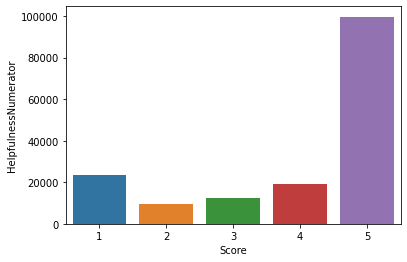

In [23]:
star_group = test_sentiment.groupby(by=["Score"]).sum().reset_index()
sns.barplot(data=star_group, x="Score", y="HelpfulnessNumerator")


<AxesSubplot:xlabel='rating', ylabel='prop of helpful reviews'>

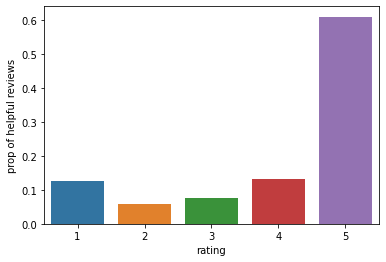

In [24]:
total_helpful_reviews  = test_sentiment[test_sentiment['HelpfulnessNumerator']>0].size


star_5s = test_sentiment[test_sentiment['Score']==5]
prop_helpful_5 = star_5s[star_5s['HelpfulnessNumerator']> 0].size / total_helpful_reviews


star_4s = test_sentiment[test_sentiment['Score']==4]
prop_helpful_4 = star_4s[star_4s['HelpfulnessNumerator']> 0].size / total_helpful_reviews


star_3s = test_sentiment[test_sentiment['Score']==3]
prop_helpful_3 = star_3s[star_3s['HelpfulnessNumerator']> 0].size / total_helpful_reviews


star_2s = test_sentiment[test_sentiment['Score']==2]
prop_helpful_2 = star_2s[star_2s['HelpfulnessNumerator']> 0].size / total_helpful_reviews

star_1s = test_sentiment[test_sentiment['Score']==1]
prop_helpful_1 = star_1s[star_1s['HelpfulnessNumerator']> 0].size / total_helpful_reviews



data = {'rating':  ['1', '2', '3', '4', '5'],
        'prop of helpful reviews': [prop_helpful_1, prop_helpful_2, prop_helpful_3, prop_helpful_4, prop_helpful_5]
        }
df = pd.DataFrame(data)

sns.barplot(data=df, x="rating", y="prop of helpful reviews")



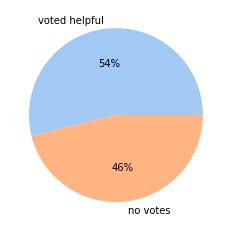

In [25]:
non_helpfulreviews = (test_sentiment['HelpfulnessNumerator'] == 0).sum()
helpfulreviews = (test_sentiment['HelpfulnessNumerator'] > 0).sum()

data = [non_helpfulreviews, helpfulreviews]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = ['voted helpful', 'no votes'], colors = colors, autopct='%.0f%%')
plt.show()


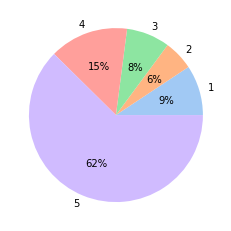

In [26]:
star_5 = (test_sentiment['Score'] == 5).sum()
star_4 = (test_sentiment['Score'] == 4).sum()
star_3 = (test_sentiment['Score'] == 3).sum()
star_2 = (test_sentiment['Score'] == 2).sum()
star_1 = (test_sentiment['Score'] == 1).sum()

data = [star_1, star_2, star_3, star_4, star_5]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = ['1', '2', '3', '4', '5'], colors = colors, autopct='%.0f%%')
plt.show()


<AxesSubplot:xlabel='reviews', ylabel='frequency'>

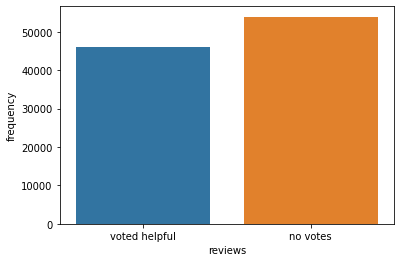

In [27]:
non_helpfulreviews = (test_sentiment['HelpfulnessNumerator'] == 0).sum()
helpfulreviews = (test_sentiment['HelpfulnessNumerator'] > 0).sum()

data = {'reviews':  ['voted helpful', 'no votes'],
        'frequency': [helpfulreviews,non_helpfulreviews ]
        }

df = pd.DataFrame(data)

sns.barplot(data=df, x="reviews", y="frequency")


In [28]:
star_group

,Score,Id,HelpfulnessNumerator,HelpfulnessDenominator,Time,reviews.length,reviews.uniquewords,reviews.titlelength,reviews.titleuniquewords,Helpfulness_Score,positive,negative,neutral,compound,exclamation_points,review_count,percent_unique_text,percent_unique_title
0,1,462429884,23357,43260,12145825584000,4523439,605298,230247,39897,1772,902.061,889.444,7526.530,405.9877,7037,21271,7540.103503,9249.764358
1,2,276779711,9442,15640,7239391027200,2819830,378245,137932,24693,1155,652.117,412.323,4503.517,1651.8251,1953,15483,4434.600550,5519.165266
2,3,402561620,12339,17886,10463501894400,4320463,572656,211172,37948,1798,1125.308,446.957,6486.692,4048.0408,2430,29641,6372.919260,7978.396416
3,4,737675330,19176,23170,18981110592000,7443540,996097,366280,64695,4454,2696.925,559.547,11386.478,10469.7140,6948,55160,11739.584707,14552.123727
4,5,3120603455,99665,112040,80792685964800,25103620,3517215,1408726,242162,22401,13750.165,1933.910,46727.841,48365.8782,56602,179983,51948.680705,62022.587591


<AxesSubplot:xlabel='Score', ylabel='positive'>

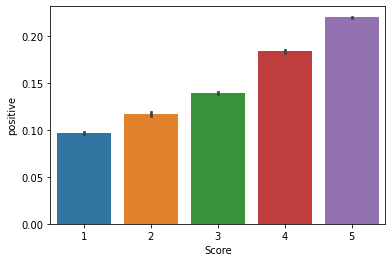

In [29]:
star_mean = test_sentiment.groupby(by=["Score"]).mean().reset_index()
sns.barplot(data=test_sentiment, x="Score", y="positive")


<AxesSubplot:xlabel='Score', ylabel='negative'>

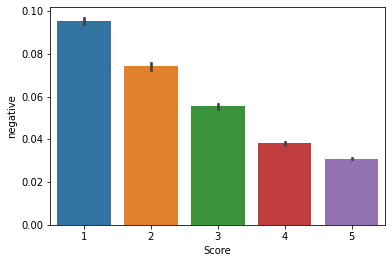

In [30]:
star_mean = test_sentiment.groupby(by=["Score"]).mean().reset_index()
sns.barplot(data=test_sentiment, x="Score", y="negative")


<AxesSubplot:xlabel='Score', ylabel='compound'>

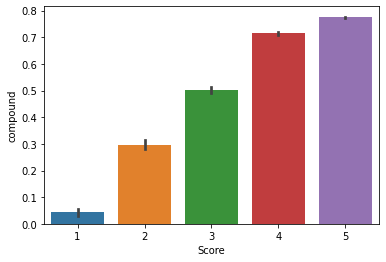

In [31]:
star_mean = test_sentiment.groupby(by=["Score"]).mean().reset_index()
sns.barplot(data=test_sentiment, x="Score", y="compound")

<AxesSubplot:xlabel='Score', ylabel='Helpfulness_Score'>

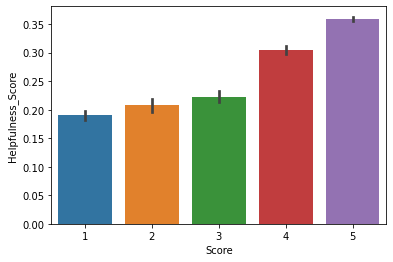

In [32]:
star_mean = test_sentiment.groupby(by=["Score"]).mean().reset_index()
sns.barplot(data=test_sentiment, x="Score", y="Helpfulness_Score")

In [33]:
test_sentiment['Helpfulness_Score'].mean()

0.3158

In [34]:
rev_group = test_sentiment.groupby(by=["Helpfulness_Score"]).mean().reset_index().sort_values('Helpfulness_Score')
rev_group['overall_helpful'] = np.where(rev_group['Helpfulness_Score']>0.25, 'yes', 'no')
helpful_rev = rev_group.groupby(by='overall_helpful').mean().reset_index()
helpful_rev

,overall_helpful,Helpfulness_Score,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,reviews.length,reviews.uniquewords,reviews.titlelength,reviews.titleuniquewords,positive,negative,neutral,compound,exclamation_points,review_count,percent_unique_text,percent_unique_title
0,no,0.0,49947.290711,1.172152,1.873973,4.033440,1.301486e+09,425.852197,58.724869,23.303937,4.059265,0.190878,0.043876,0.765243,0.626094,0.722209,2.982155,0.824203,0.993129
1,yes,2.0,57268.669395,2.826519,1.826503,4.705434,1.254860e+09,466.167036,64.482091,28.531257,5.584508,0.250551,0.028636,0.720813,0.841768,0.404646,3.043687,0.773832,0.996709


<AxesSubplot:xlabel='overall_helpful', ylabel='reviews.uniquewords'>

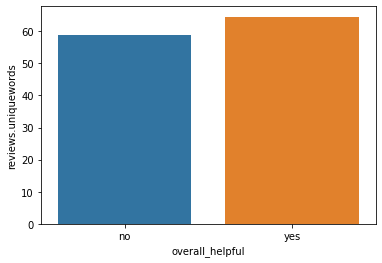

In [35]:
sns.barplot(data=helpful_rev, x="overall_helpful", y="reviews.uniquewords")


<AxesSubplot:xlabel='overall_helpful', ylabel='reviews.length'>

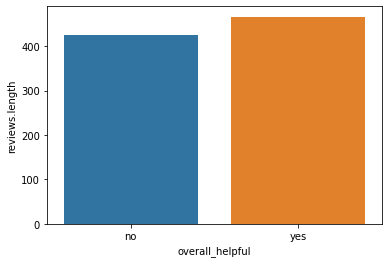

In [36]:
sns.barplot(data=helpful_rev, x="overall_helpful", y="reviews.length")


<AxesSubplot:xlabel='overall_helpful', ylabel='compound'>

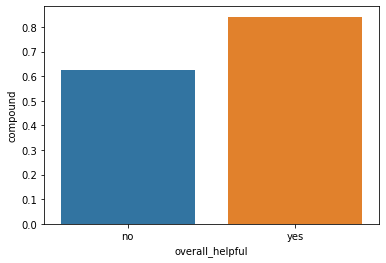

In [37]:
sns.barplot(data=helpful_rev, x="overall_helpful", y="compound")


In [38]:
test_sentiment['Is_helpful'] = np.where(test_sentiment['Helpfulness_Score']>0.25, 'yes', 'no')
test_sentiment

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,...,Helpfulness_Score,positive,negative,neutral,compound,exclamation_points,review_count,percent_unique_text,percent_unique_title,Is_helpful
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,...,1,0.305,0.000,0.695,0.9441,0,1,0.854167,1.0,yes
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,...,0,0.000,0.138,0.862,-0.5664,0,1,0.903226,1.0,no
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,...,1,0.155,0.091,0.754,0.8265,0,1,0.744681,1.0,yes
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,...,1,0.000,0.000,1.000,0.0000,0,1,0.878049,1.0,yes
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,...,0,0.448,0.000,0.552,0.9468,0,1,0.814815,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,5,1254096000,yummy!,I just love it and will buy another box when I...,...,0,0.257,0.000,0.743,0.6696,1,1,1.000000,1.0,no
99996,99997,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,4,1250985600,Tastes like More!,My late father in law used to have a rating sy...,...,0,0.129,0.021,0.850,0.9612,2,1,0.695876,1.0,no
99997,99998,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,5,1237766400,Great ramen,This is my favorite brand of Korean ramen. It ...,...,0,0.190,0.000,0.810,0.8555,0,1,0.840909,1.0,no
99998,99999,B000LQORDE,A9Q950IPXJR1D,"Lynda ""casual customer""",2,5,4,1237161600,Spicy!!,"I do like these noodles although, to say they ...",...,0,0.170,0.033,0.797,0.8455,1,1,0.822581,1.0,no


In [39]:
test_sentiment['strong_sentiment'] = np.where(abs(test_sentiment['compound'])>0.3, 'yes', 'no')
test_sentiment

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,...,positive,negative,neutral,compound,exclamation_points,review_count,percent_unique_text,percent_unique_title,Is_helpful,strong_sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,...,0.305,0.000,0.695,0.9441,0,1,0.854167,1.0,yes,yes
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,...,0.000,0.138,0.862,-0.5664,0,1,0.903226,1.0,no,yes
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,...,0.155,0.091,0.754,0.8265,0,1,0.744681,1.0,yes,yes
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,...,0.000,0.000,1.000,0.0000,0,1,0.878049,1.0,yes,no
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,...,0.448,0.000,0.552,0.9468,0,1,0.814815,1.0,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,5,1254096000,yummy!,I just love it and will buy another box when I...,...,0.257,0.000,0.743,0.6696,1,1,1.000000,1.0,no,yes
99996,99997,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,4,1250985600,Tastes like More!,My late father in law used to have a rating sy...,...,0.129,0.021,0.850,0.9612,2,1,0.695876,1.0,no,yes
99997,99998,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,5,1237766400,Great ramen,This is my favorite brand of Korean ramen. It ...,...,0.190,0.000,0.810,0.8555,0,1,0.840909,1.0,no,yes
99998,99999,B000LQORDE,A9Q950IPXJR1D,"Lynda ""casual customer""",2,5,4,1237161600,Spicy!!,"I do like these noodles although, to say they ...",...,0.170,0.033,0.797,0.8455,1,1,0.822581,1.0,no,yes


In [40]:
text_helpful = test_sentiment.loc[test_sentiment['strong_sentiment'] == 'yes'][['Text']]
text_nothelpful =  test_sentiment.loc[test_sentiment['strong_sentiment'] == 'no'][['Text']]

In [41]:
#text_helpful = test_sentiment.loc[test_sentiment['Helpfulness_Score'] > 0][['Text']]
#text_nothelpful =  test_sentiment.loc[test_sentiment['Helpfulness_Score'] ==0][['Text']]

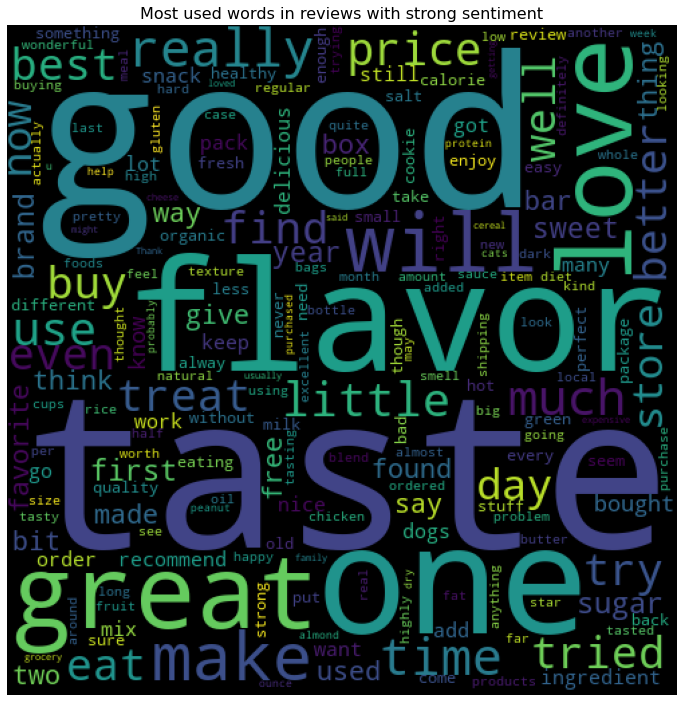

In [42]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
stopwords = STOPWORDS.update(['coffee', 'water', 'juice', 'br', 'dog', 'tea', 'chip', 'chocolate', 'food', 'drink', 'bag', 'chips', 'cup', 'Amazon', 'product', 'cat'])
wc=WordCloud(collocations=False,width=500,height=500, stopwords = stopwords).generate(''.join(text_helpful['Text']))
plt.figure(figsize=(12,15))
plt.imshow(wc)
plt.title('Most used words in reviews with strong sentiment',size =16)
plt.axis('off')
plt.show()


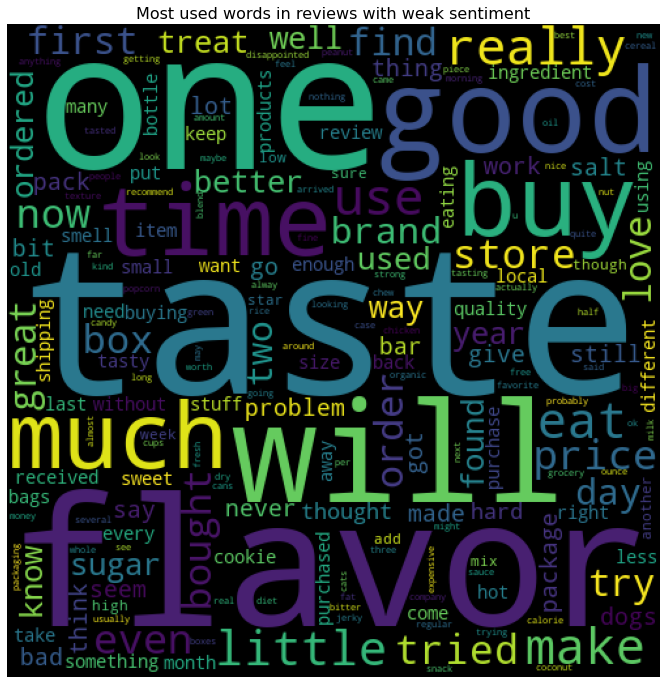

In [43]:
wordcloud=WordCloud(collocations=False,width=500,height=500, stopwords = stopwords).generate(''.join(text_nothelpful['Text']))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.title('Most used words in reviews with weak sentiment',size =16)
plt.axis('off')
plt.show()

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

from sklearn.feature_extraction.text import CountVectorizer
X = test_sentiment[['Score','reviews.length', 'percent_unique_text', 'reviews.titlelength',
                'percent_unique_title', 'compound', 'review_count', 'exclamation_points']]

# lab = preprocessing.LabelEncoder()
y = test_sentiment["Helpfulness_Score"]
# y_transformed = lab.fit_transform

# Split the data into training and test sets for the main model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state =42)

# Train the random forest classifier for the main model
rf = RandomForestClassifier(n_estimators=900, min_samples_split=5, min_samples_leaf = 1, max_features = "sqrt", oob_score = True, n_jobs=-1)
rf.fit(X_train, y_train)

# Use the trained model to make predictions on the test set for the main model
y_pred = rf.predict(X)

# Evaluate the model's performance for the main model
accuracy = rf.score(X, y)
print("Accuracy for main model:", accuracy)

acc = accuracy_score(y, y_pred)
acc

Accuracy for main model: 0.9406


0.9406

In [45]:
# accuracy on test set
y_pred = rf.predict(X_test)
accuracy = rf.score(X_test, y_test)

acc = accuracy_score(y_test, y_pred)
acc

0.7252

In [46]:
split = [2,5,10,15,20]
for spliter in split:
    rfor =  RandomForestClassifier(n_estimators=750, min_samples_split=spliter, oob_score = True, n_jobs=-1)
    rfor = rfor.fit(X_train, y_train)
    print(1 - rfor.oob_score_)

0.27918750000000003
0.2770625
0.2833875
0.28885000000000005
0.29293749999999996


In [47]:
n_est = [250, 500, 750, 900, 1500]
for estimator in n_est:
    rfor =  RandomForestClassifier(n_estimators=estimator,oob_score = True, n_jobs=-1, min_samples_split=5)
    rfor = rfor.fit(X_train, y_train)
    print(1 - rfor.oob_score_)

0.2794875
0.27671250000000003
0.27698750000000005
0.27661250000000004
0.27646250000000006


In [48]:
leaves = [1,2,3]
for leaf in leaves:
    rfor =  RandomForestClassifier(n_estimators=900, min_samples_split=5, min_samples_leaf = leaf, oob_score = True, n_jobs=-1)
    rfor = rfor.fit(X_train, y_train)
    print(1 - rfor.oob_score_)

0.2754875
0.2796875
0.28585000000000005


In [49]:
features = ["auto", "sqrt", "log2", 0.9, 0.2, None]
for feature in features:
    rfor =  RandomForestClassifier(n_estimators=900, min_samples_split=5, min_samples_leaf = 1, max_features = feature, oob_score = True, n_jobs=-1)
    rfor = rfor.fit(X_train, y_train)
    print(1 - rfor.oob_score_)

0.27656250000000004
0.2764875
0.27717499999999995
0.281625
0.2772875
0.281625


In [50]:
X_test['prediction'] = y_pred
X_test['actual'] = y_test
X_test.head()

,Score,reviews.length,percent_unique_text,reviews.titlelength,percent_unique_title,compound,review_count,exclamation_points,prediction,actual
75721,5,250,0.804348,11,1.0,-0.2490,6,0,0,1
80184,5,1047,0.684211,38,1.0,0.9616,16,0,1,1
19864,5,776,0.719178,15,1.0,0.9671,1,3,0,1
76699,5,137,0.833333,6,1.0,0.8588,1,1,0,0
92991,3,1540,0.665217,34,1.0,0.8591,3,0,0,0


In [51]:
X_test_table = X_test.head(10)
X_test_table

,Score,reviews.length,percent_unique_text,reviews.titlelength,percent_unique_title,compound,review_count,exclamation_points,prediction,actual
75721,5,250,0.804348,11,1.0,-0.2490,6,0,0,1
80184,5,1047,0.684211,38,1.0,0.9616,16,0,1,1
19864,5,776,0.719178,15,1.0,0.9671,1,3,0,1
76699,5,137,0.833333,6,1.0,0.8588,1,1,0,0
92991,3,1540,0.665217,34,1.0,0.8591,3,0,0,0
76434,5,464,0.837209,14,1.0,0.9558,3,1,1,1
84004,5,94,0.900000,20,1.0,0.7906,1,0,0,0
80917,5,118,0.950000,40,1.0,0.9165,1,0,0,0
60767,5,620,0.816327,14,1.0,0.9393,1,0,0,1
50074,5,208,0.964286,22,1.0,0.8439,9,1,0,0


In [52]:
test2 = test_sentiment
test_sentiment_table = test_sentiment.reset_index().merge(X_test_table.reset_index(), on='index', how='right')
test_sentiment_table

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score_x,Time,Summary,...,Score_y,reviews.length_y,percent_unique_text_y,reviews.titlelength_y,percent_unique_title_y,compound_y,review_count_y,exclamation_points_y,prediction,actual
0,75721,75722,B004MO6NI8,A1NOV41485TE0D,"S. Walker ""Wicked Walker Reviews""",1,1,5,1345593600,tastes good,...,5,250,0.804348,11,1.0,-0.2490,6,0,0,1
1,80184,80185,B000J2JKGO,A2TJG4N8LNJW23,Blythe Dresser,3,3,5,1316995200,Great choice for the active young dog!,...,5,1047,0.684211,38,1.0,0.9616,16,0,1,1
2,19864,19865,B00390T5JA,A4HPRAH83XJMN,"L. T. Smith ""xlh_stud""",2,2,5,1321056000,Love my Keurig!,...,5,776,0.719178,15,1.0,0.9671,1,3,0,1
3,76699,76700,B0049ULB78,A7S0SH4IKOVIV,"SadGirl ""Sadgirl""",0,0,5,1208822400,Coffee,...,5,137,0.833333,6,1.0,0.8588,1,1,0,0
4,92991,92992,B004YV80OE,A2YM3KILJ1G0YJ,Jason,1,2,3,1316736000,Target Audience: Velveeta Fanatics,...,3,1540,0.665217,34,1.0,0.8591,3,0,0,0
5,76434,76435,B001HTKOWC,A24NRZ0QHDM9PY,KAM,1,1,5,1274400000,A New Favorite,...,5,464,0.837209,14,1.0,0.9558,3,1,1,1
6,84004,84005,B000K7644E,A3136SXLYQWW9U,Kent,0,0,5,1338854400,Interesting Sea Salt,...,5,94,0.900000,20,1.0,0.7906,1,0,0,0
7,80917,80918,B0029JW9JU,A1VMG2HXMG41AR,"Stephen S. Connaway ""avid reader""",0,0,5,1349481600,food or in my case goodies Italian Style,...,5,118,0.950000,40,1.0,0.9165,1,0,0,0
8,60767,60768,B003QNJYXM,A2EKWSI3QO8WG1,John Morgan,1,1,5,1338249600,Lots of ENERGY,...,5,620,0.816327,14,1.0,0.9393,1,0,0,1
9,50074,50075,B00113SKZW,A132ETQPMHQ585,"Donna's Reviews ""I Love Shopping on Amazon!""",0,0,5,1327622400,GREAT...gluten free...,...,5,208,0.964286,22,1.0,0.8439,9,1,0,0


In [53]:
test_sentiment_table[['index','Text', 'prediction', 'actual']]

,index,Text,prediction,actual
0,75721,This brand of energy drink tastes good and rea...,0,1
1,80184,I'm the owner of a year and a half old beagle ...,1,1
2,19864,Great product! Perfect for coffee lovers becau...,0,1
3,76699,It had a great variety and I am not much of a ...,0,0
4,92991,"First of all, to call this a ""Chicken and Broc...",0,0
5,76434,I'm always seeing everywhere how good green te...,1,1
6,84004,This is a good product. Has an unique taste t...,0,0
7,80917,What a wonderful surprise this turned out to b...,0,0
8,60767,I Work 12 hour shifts that usually turn into 1...,0,1
9,50074,GREAT...gluten free...Edward & Sons Not-Beef B...,0,0


In [54]:
test_data.loc[60767]['Text']

'I Work 12 hour shifts that usually turn into 13-14 hours of work and then only get about 5-6 hours of sleep in between. So naturally, I have tried just about every energy drink and shot out there.  I have to say that 5 Hour def. gets the job done with an ok flavor.  Another brand I use is <a href="http://www.amazon.com/gp/product/B0038NEOKS">AdvoCare Spark® Energy Drink (Fruit Punch)</a> or <a href="http://www.amazon.com/gp/product/B002TRN26G">Advocare Spark Energy Drink Canister (Mandarin Orange)</a>, that is if they have it in stock.  There are a ton of serving so it\'s def cost effective.  Either one are great.'